Dataset Loaded Successfully!
Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0



=== Data Types ===
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

=== Missing Values ===
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

=== Descriptive Statistics ===


,count,mean,std,min,25%,50%,75%,max
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2106.0,0.003219,0.004391,-0.019284,0.000000,0.001634,0.005650,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


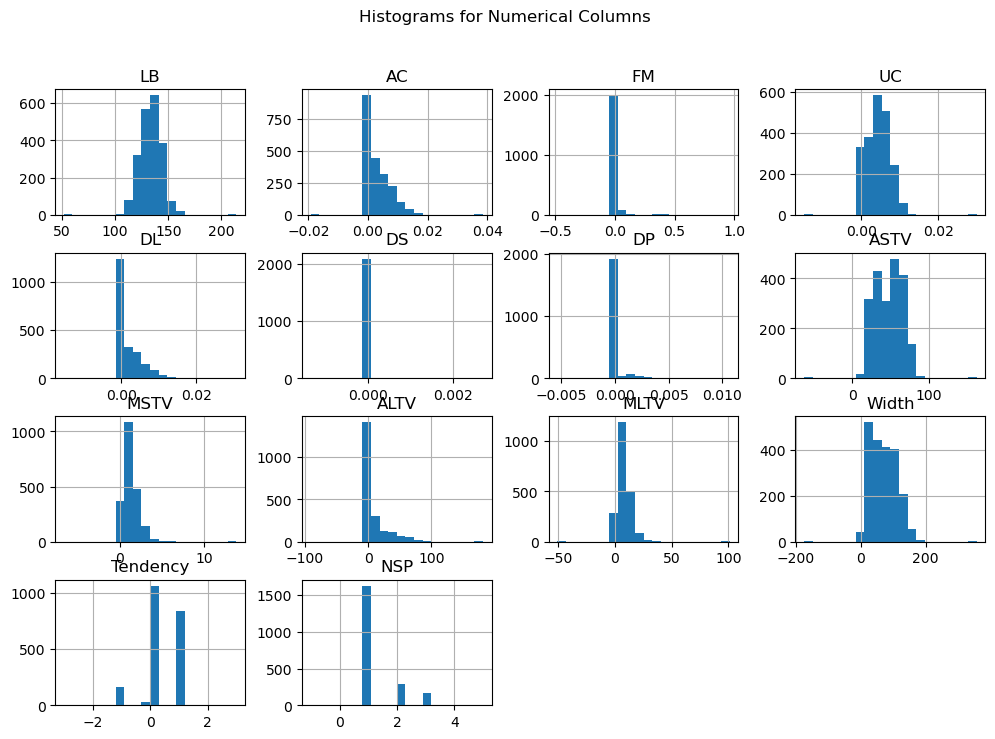

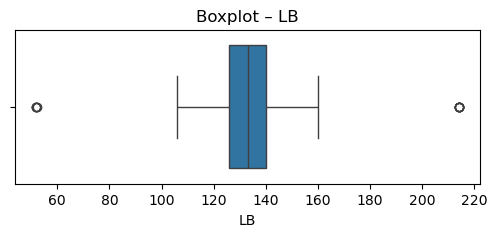

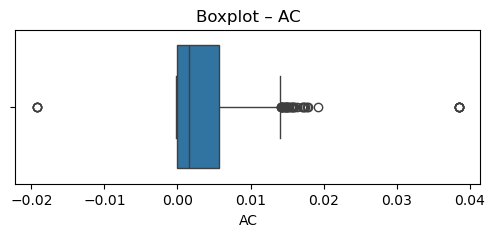

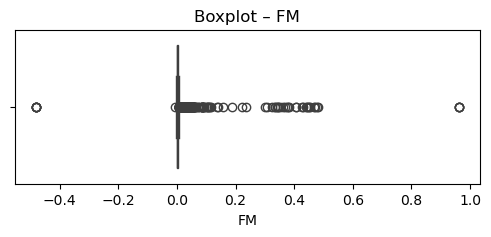

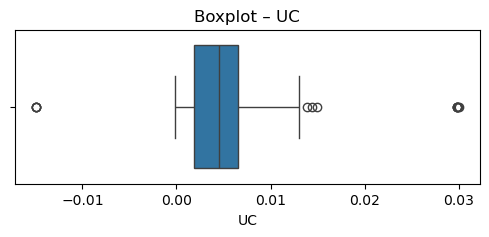

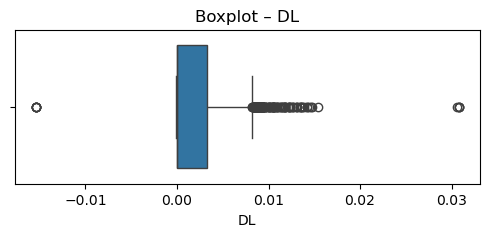

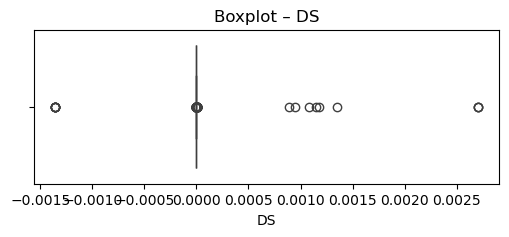

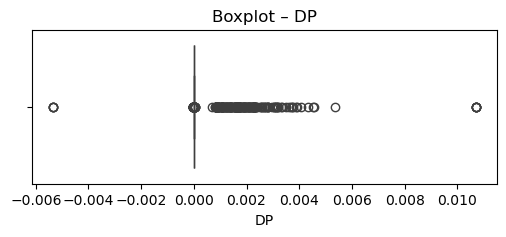

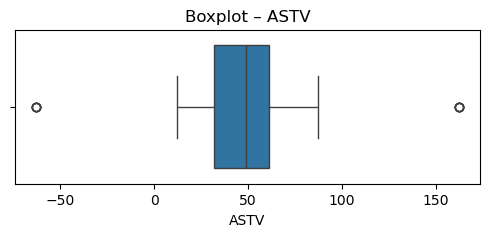

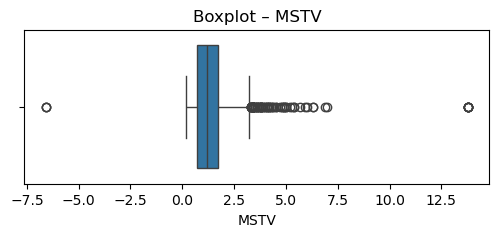

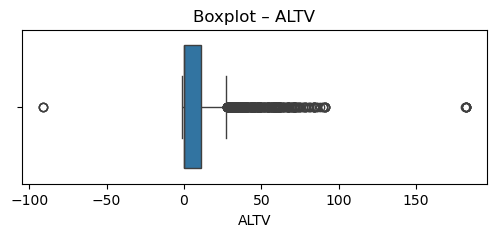

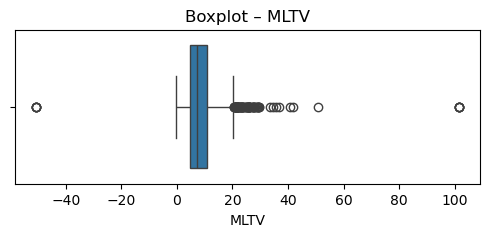

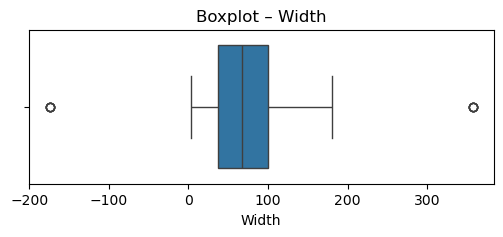

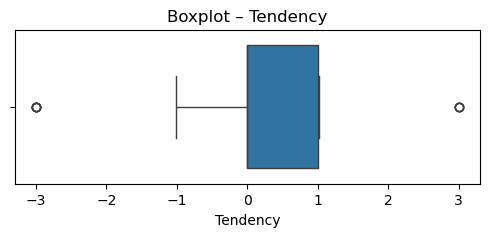

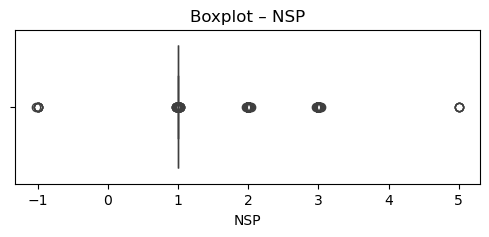

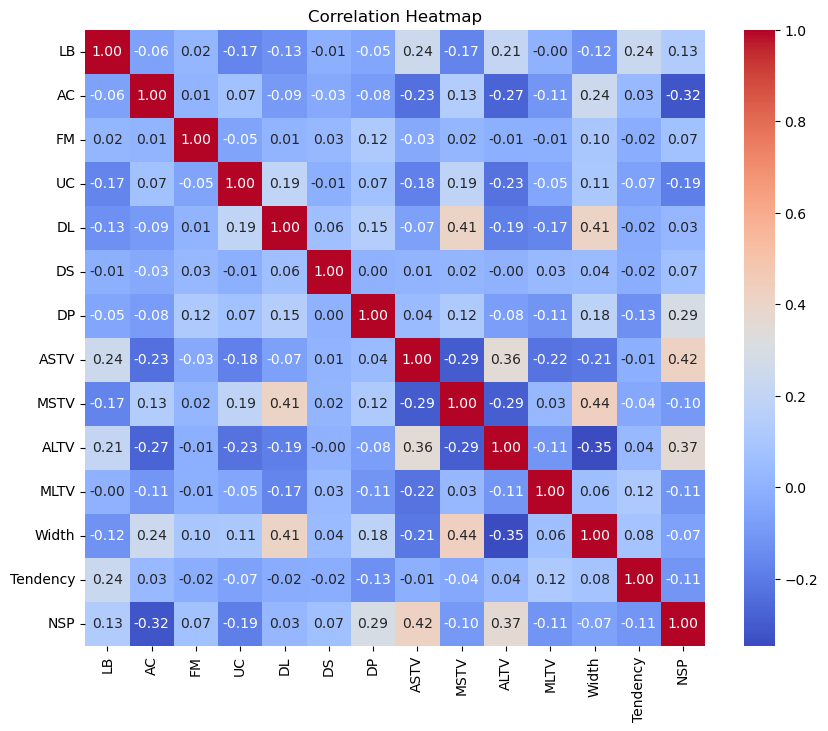

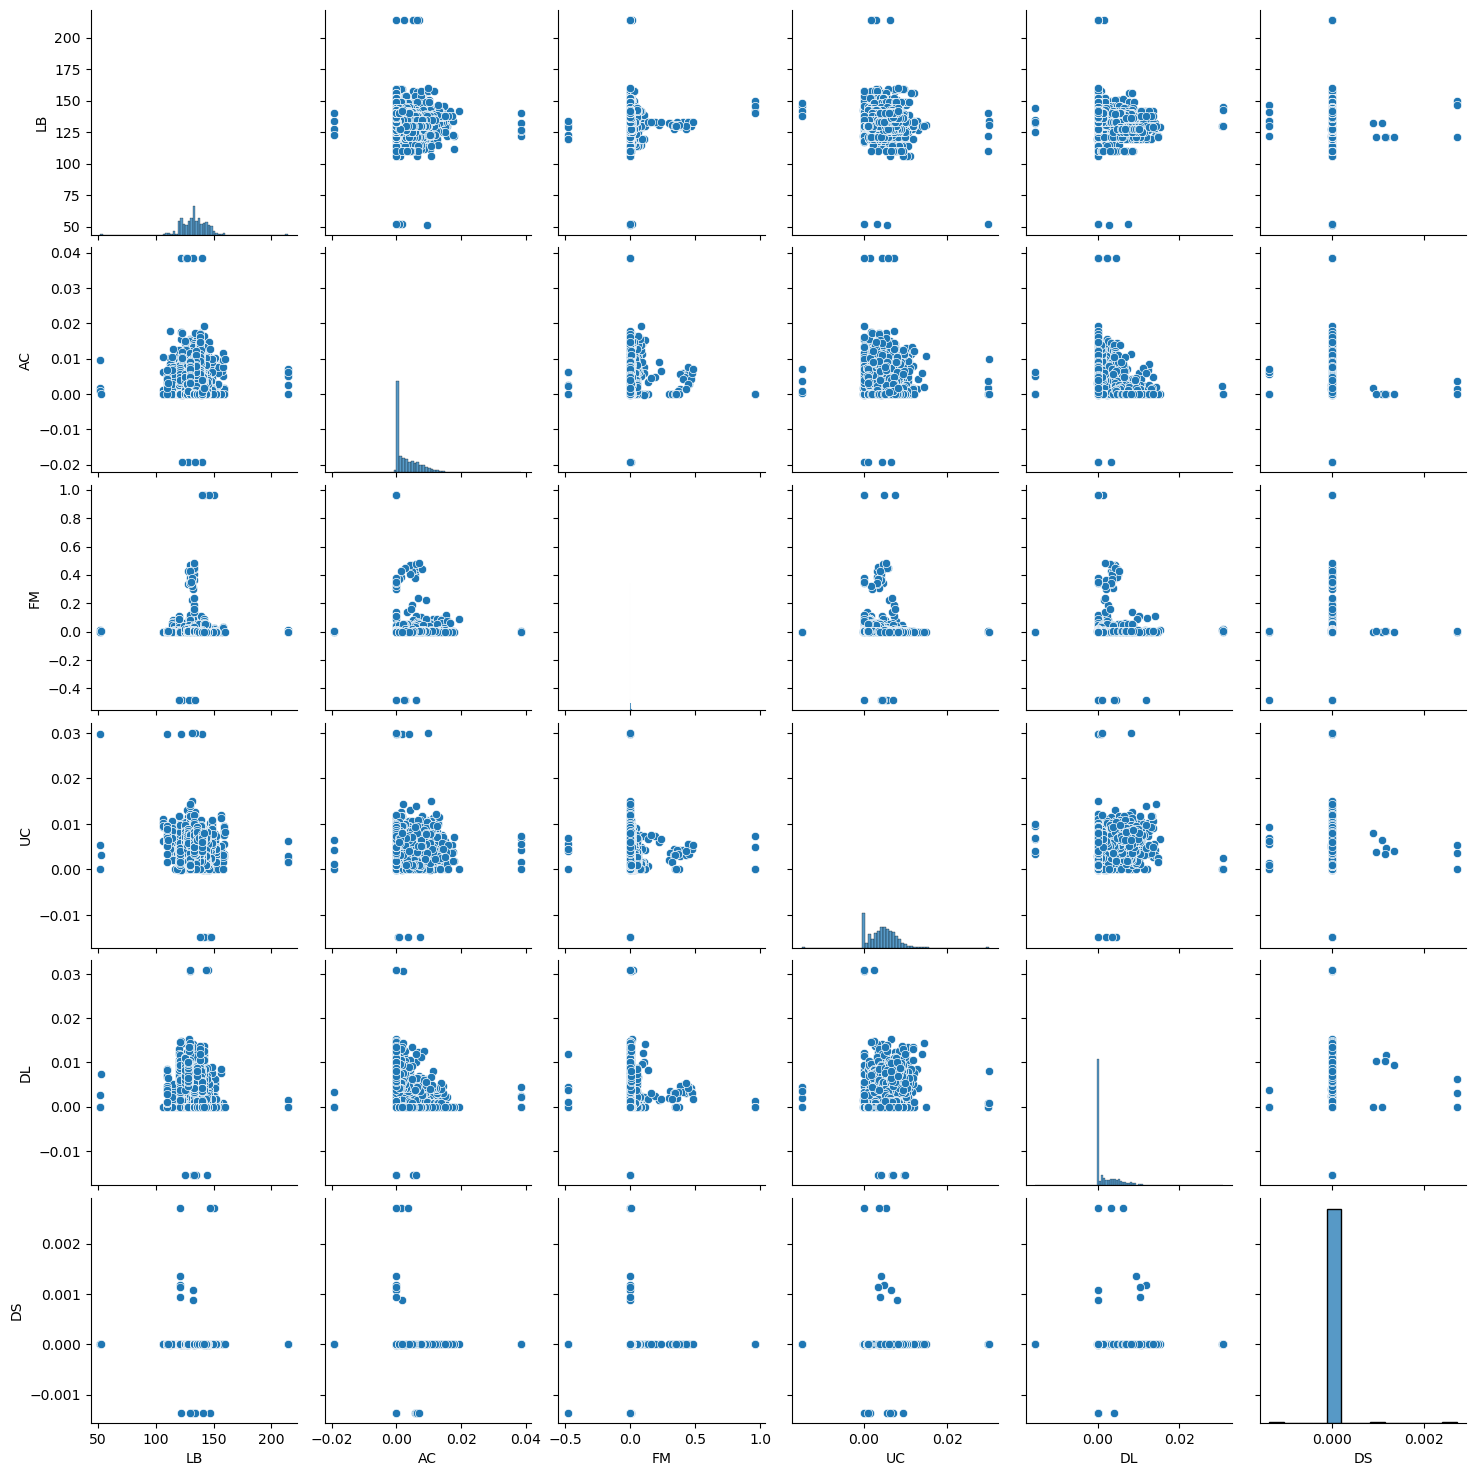


=== Outlier Detection (IQR Method) ===
{'LB': 10, 'AC': 40, 'FM': 347, 'UC': 13, 'DL': 125, 'DS': 120, 'DP': 284, 'ASTV': 10, 'MSTV': 80, 'ALTV': 318, 'MLTV': 81, 'Width': 10, 'Tendency': 10, 'NSP': 559}

Cleaned file saved successfully!


In [1]:
# ============================================================
# FULL EDA PROGRAM FOR CARDIOTOCOGRAPHIC DATA
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ LOAD DATA ------------------
df = pd.read_csv(r"C:\Users\abhin\Downloads\Cardiotocographic (1).csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# ------------------ BASIC INFO ------------------
print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

# ------------------ DESCRIPTIVE STATS ------------------
print("\n=== Descriptive Statistics ===")
display(df.describe().T)

# ------------------ HISTOGRAMS ------------------
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms for Numerical Columns")
plt.show()

# ------------------ BOXPLOTS (Outliers) ------------------
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

# ------------------ CORRELATION MATRIX ------------------
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ------------------ PAIRPLOT (Optional) ------------------
sns.pairplot(df.iloc[:, :6])
plt.show()

# ------------------ OUTLIER DETECTION (IQR) ------------------
print("\n=== Outlier Detection (IQR Method) ===")
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outliers[col] = count

print(outliers)

# ------------------ SAVE CLEANED DATA ------------------
df.to_csv(r"C:\Users\abhin\Downloads\cleaned_cardiotocographic.csv", index=False)

print("\nCleaned file saved successfully!")
